# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [12]:
df = pd.read_csv('CHURN_CREDIT_MOD15_PART02.csv')
df.head(10)

,customerID,Gender,Senior,Married,Dependents,Tenure,Internet_Service,Security_Service,Technical_Support,StreamingTV,Contract_Type,PaymentMethod,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,No,No,No,No,One year,Mailed check,71.45,1022.95,No
5,9959-WOFKT,Male,0,No,Yes,71,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,No
6,4190-MFLUW,Female,0,Yes,Yes,10,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,Yes
7,4183-MYFRB,Female,0,No,No,21,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,No
8,8779-QRDMV,Male,1,No,No,1,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,Yes
9,1680-VDCWW,Male,0,Yes,No,12,No,No,No,No,One year,Bank transfer (automatic),71.45,202.25,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [16]:
#A)
df.describe()

,Senior,Tenure,Monthly_Charges,Total_Charges
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178
std,0.368135,24.636885,28.051718,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


In [ ]:
#B) Não há outliers evidentes, mas a variável Total_Charges (Total_Pago) apresenta alta dispersão, o que pode causar estranheza e merece atenção.

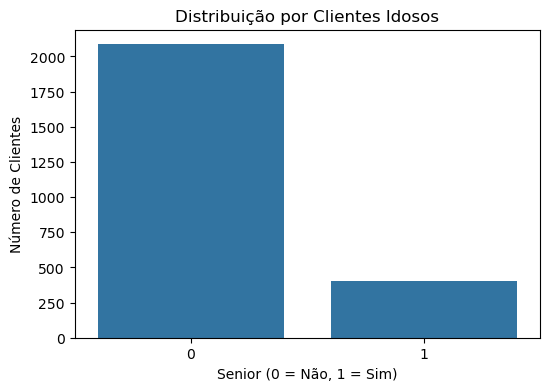

In [60]:
#C) 01 - Senior - A maioria dos clientes não são seniors (idosos), indicando que o público majoritário da base é composto por pessoas mais jovens.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Senior')
plt.title('Distribuição por Clientes Idosos')
plt.xlabel('Senior (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()

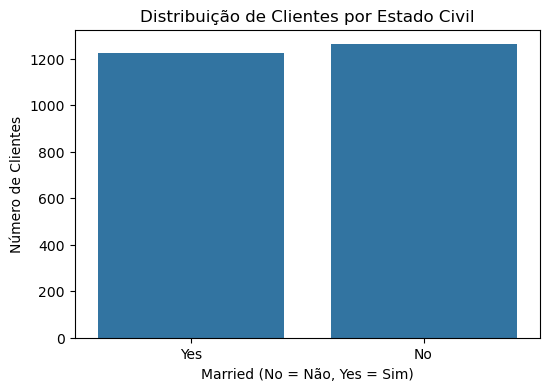

In [56]:
#C) 02 - Married - A distribuição entre clientes casados e não casados está relativamente equilibrada, sem grande variação entre as categorias.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Married')
plt.title('Distribuição de Clientes por Estado Civil')
plt.xlabel('Married (No = Não, Yes = Sim)')
plt.ylabel('Número de Clientes')
plt.show()

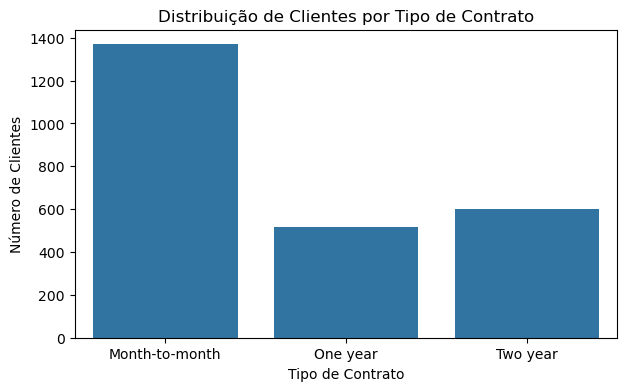

In [28]:
#C) 03 - Contract_Type - A maioria dos clientes possui contratos mensais, essa preferência por contratos mais curtos pode indicar maior 
#                        flexibilidade ou menor comprometimento.
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Contract_Type')
plt.title('Distribuição de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

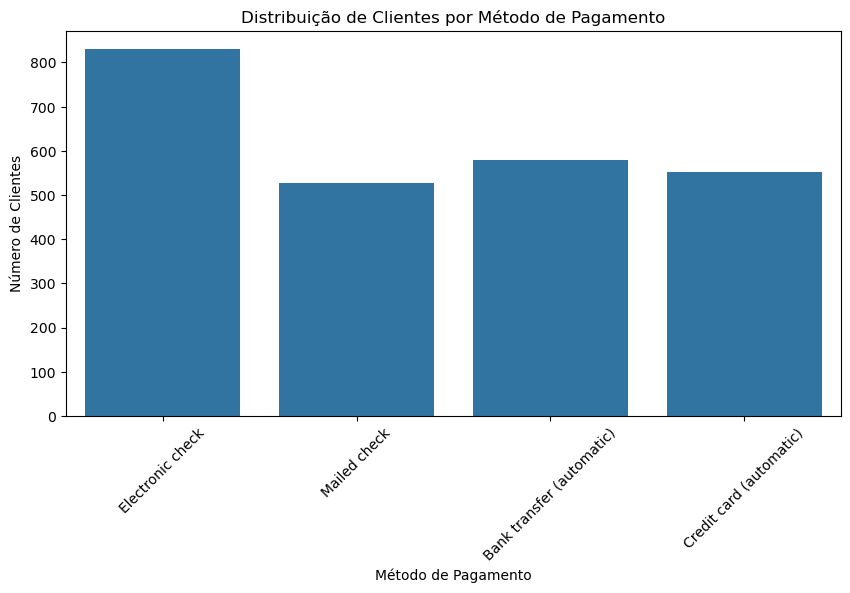

In [32]:
#C) 04 - PaymentMethod - O método Electronic check é o mais utilizado, destacando-se dos demais, que apresentam distribuição semelhante entre si.
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod')
plt.title('Distribuição de Clientes por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

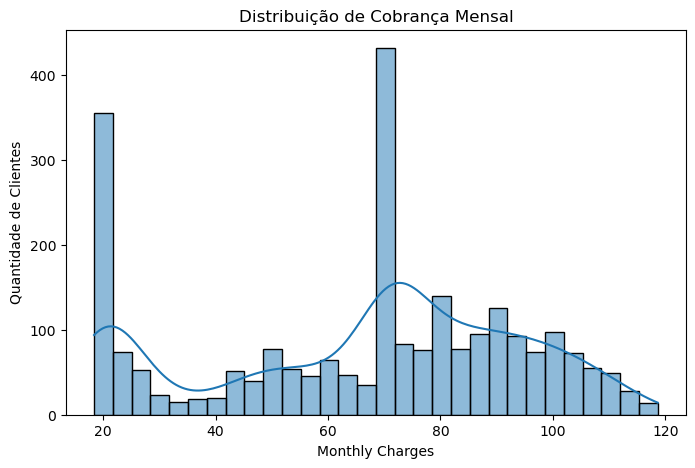

In [54]:
#C) 05- Monthly_Charges - A distribuição de Monthly_Charges mostra maior concentração entre valores intermediários.
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Monthly_Charges', bins=30, kde=True)
plt.title('Distribuição de Cobrança Mensal')
plt.xlabel('Monthly Charges')
plt.ylabel('Quantidade de Clientes')
plt.show()

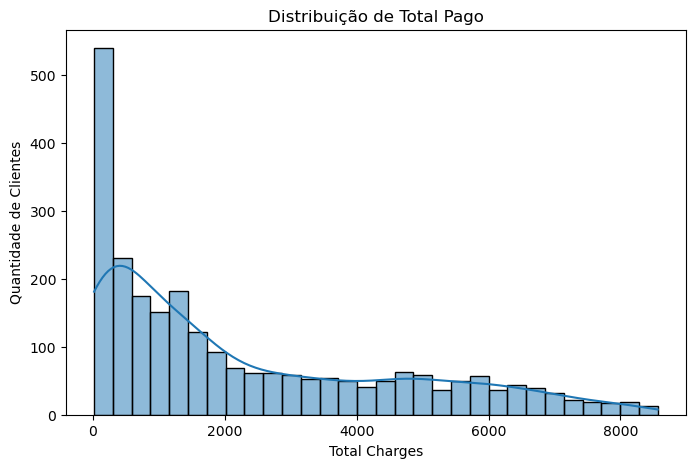

In [52]:
#C) 06- Total_Charges - A maioria dos clientes possui valores baixos de Total_Charges, com poucos casos em valores mais altos, 
#                       o que sugere uma concentração inicial de faturamento.
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Total_Charges', bins=30, kde=True)
plt.title('Distribuição de Total Pago')
plt.xlabel('Total Charges')
plt.ylabel('Quantidade de Clientes')
plt.show()

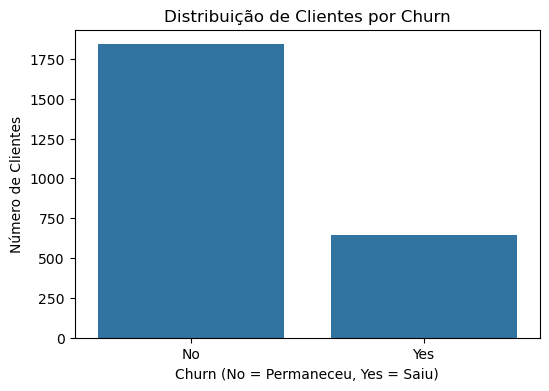

In [49]:
#C) 07- Churn - A maioria dos clientes permaneceu, mas há uma parte significativa que saiu, indicando um leve desbalanceamento na base.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn (No = Permaneceu, Yes = Saiu)')
plt.ylabel('Número de Clientes')
plt.show()

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


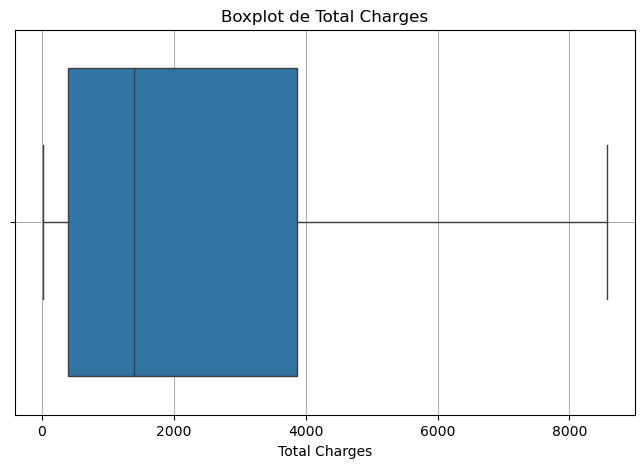

In [34]:
#Segundo o que observamos no describe, a variável Total_Charges apresentou uma alta dispersão. Porém, ao analisarmos o boxplot, 
# entendemos que não existem outliers. Por isso, opto por manter as colunas como estão.
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Total_Charges')
plt.title('Boxplot de Total Charges')
plt.xlabel('Total Charges')
plt.grid(True)
plt.show()

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

### Questiomamentos
1 - O tipo de contrato influencia o churn?

2 - Clientes mais antigos têm menor churn?

3 - A faixa de mensalidade está relacionada ao churn?

4 - O método de pagamento impacta a permanência?

5 - Clientes seniors têm maior propensão ao churn?

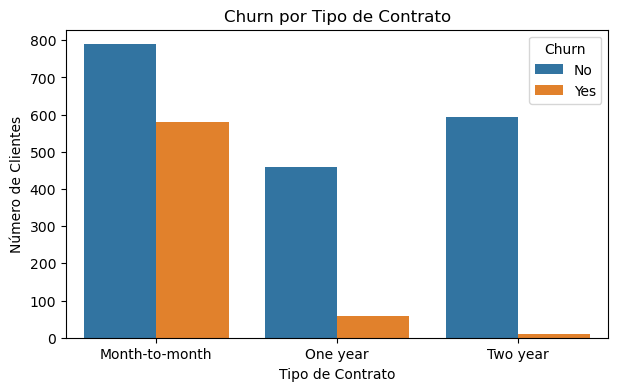

In [69]:
# 1 - O tipo de contrato influencia o churn?
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Contract_Type', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

Clientes com contrato mensal apresentam maior churn, possivelmente por estarem em fase de teste, enquanto contratos mais longos têm menos cancelamentos, indicando que maior compromisso reduz a chance de saída.

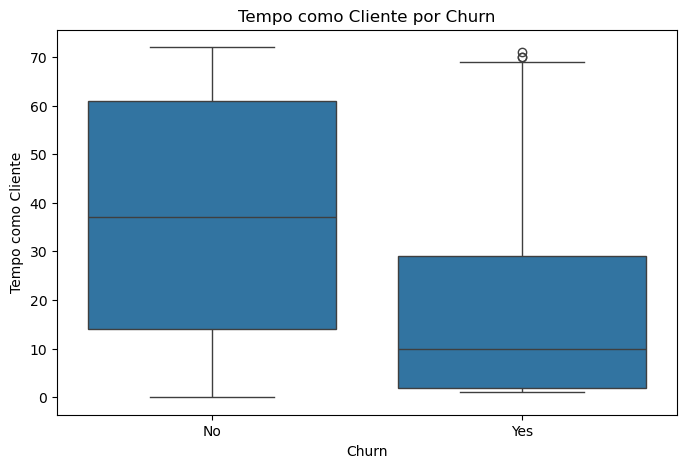

In [76]:
#2 - Clientes mais antigos têm menor churn?
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title('Tempo como Cliente por Churn')
plt.xlabel('Churn')
plt.ylabel('Tempo como Cliente')
plt.show()

Clientes com menor tempo de contrato tendem a cancelar mais, indicando que o churn é mais comum nos estágios iniciais.

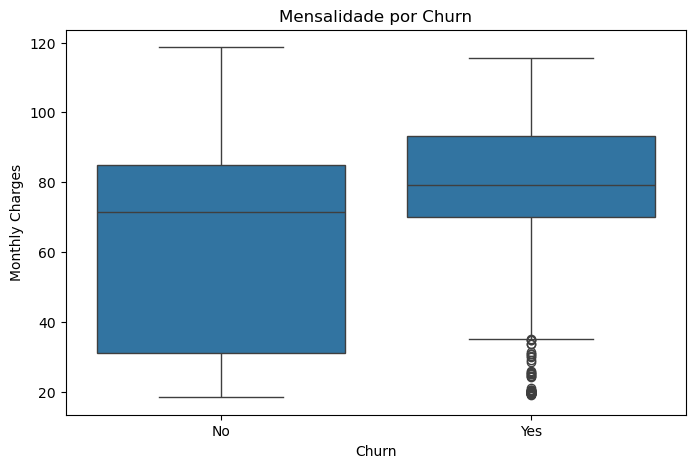

In [80]:
#3 - A faixa de mensalidade está relacionada ao churn?
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Monthly_Charges')
plt.title('Mensalidade por Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Clientes que cancelam tendem a pagar mensalidades mais altas, sugerindo possível insatisfação com o custo.

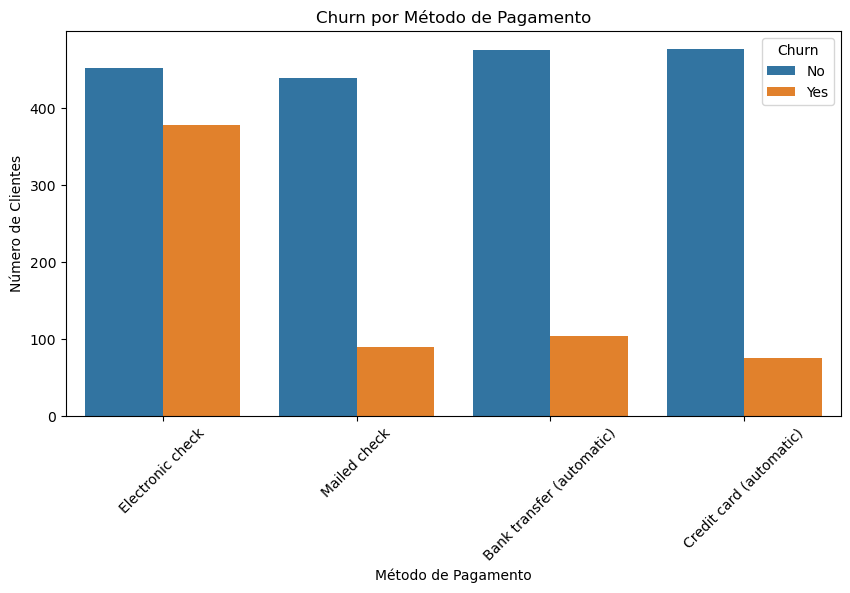

In [83]:
#4 - O método de pagamento impacta a permanência?
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

O churn é mais frequente entre clientes que usam Electronic check, sugerindo que métodos não automáticos estão ligados a maior rotatividade.

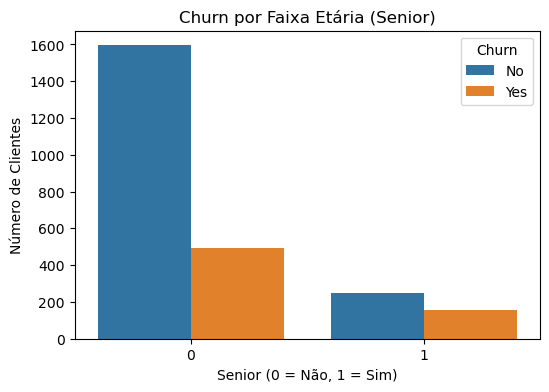

In [86]:
#5 - Clientes seniors têm maior propensão ao churn?
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Senior', hue='Churn')
plt.title('Churn por Faixa Etária (Senior)')
plt.xlabel('Senior (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()

Clientes seniors apresentam maior proporção de churn, indicando que esse grupo pode ter maior tendência ao cancelamento.

## B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

As variáveis Contract_Type e Tempo_como_Cliente se destacam como as mais relevantes para o churn.
Clientes com contratos mensais apresentaram uma taxa de cancelamento muito superior aos demais, indicando que menor comprometimento favorece o churn. Já o tempo como cliente mostrou que quanto mais recente o cliente, maior a chance de saída, revelando um ponto crítico nos primeiros meses do relacionamento.